# Computer Vision Nanodegree

## Project: Image Captioning

---

In this notebook, you will train your CNN-RNN model.  

You are welcome and encouraged to try out many different architectures and hyperparameters when searching for a good model.

This does have the potential to make the project quite messy!  Before submitting your project, make sure that you clean up:
- the code you write in this notebook.  The notebook should describe how to train a single CNN-RNN architecture, corresponding to your final choice of hyperparameters.  You should structure the notebook so that the reviewer can replicate your results by running the code in this notebook.  
- the output of the code cell in **Step 2**.  The output should show the output obtained when training the model from scratch.

This notebook **will be graded**.  

Feel free to use the links below to navigate the notebook:
- [Step 1](#step1): Training Setup
- [Step 2](#step2): Train your Model
- [Step 3](#step3): (Optional) Validate your Model

<a id='step1'></a>
## Step 1: Training Setup

In this step of the notebook, you will customize the training of your CNN-RNN model by specifying hyperparameters and setting other options that are important to the training procedure.  The values you set now will be used when training your model in **Step 2** below.

You should only amend blocks of code that are preceded by a `TODO` statement.  **Any code blocks that are not preceded by a `TODO` statement should not be modified**.

### Task #1

Begin by setting the following variables:
- `batch_size` - the batch size of each training batch.  It is the number of image-caption pairs used to amend the model weights in each training step. 
- `vocab_threshold` - the minimum word count threshold.  Note that a larger threshold will result in a smaller vocabulary, whereas a smaller threshold will include rarer words and result in a larger vocabulary.  
- `vocab_from_file` - a Boolean that decides whether to load the vocabulary from file. 
- `embed_size` - the dimensionality of the image and word embeddings.  
- `hidden_size` - the number of features in the hidden state of the RNN decoder.  
- `num_epochs` - the number of epochs to train the model.  We recommend that you set `num_epochs=3`, but feel free to increase or decrease this number as you wish.  [This paper](https://arxiv.org/pdf/1502.03044.pdf) trained a captioning model on a single state-of-the-art GPU for 3 days, but you'll soon see that you can get reasonable results in a matter of a few hours!  (_But of course, if you want your model to compete with current research, you will have to train for much longer._)
- `save_every` - determines how often to save the model weights.  We recommend that you set `save_every=1`, to save the model weights after each epoch.  This way, after the `i`th epoch, the encoder and decoder weights will be saved in the `models/` folder as `encoder-i.pkl` and `decoder-i.pkl`, respectively.
- `print_every` - determines how often to print the batch loss to the Jupyter notebook while training.  Note that you **will not** observe a monotonic decrease in the loss function while training - this is perfectly fine and completely expected!  You are encouraged to keep this at its default value of `100` to avoid clogging the notebook, but feel free to change it.
- `log_file` - the name of the text file containing - for every step - how the loss and perplexity evolved during training.

If you're not sure where to begin to set some of the values above, you can peruse [this paper](https://arxiv.org/pdf/1502.03044.pdf) and [this paper](https://arxiv.org/pdf/1411.4555.pdf) for useful guidance!  **To avoid spending too long on this notebook**, you are encouraged to consult these suggested research papers to obtain a strong initial guess for which hyperparameters are likely to work best.  Then, train a single model, and proceed to the next notebook (**3_Inference.ipynb**).  If you are unhappy with your performance, you can return to this notebook to tweak the hyperparameters (and/or the architecture in **model.py**) and re-train your model.

### Question 1

**Question:** Describe your CNN-RNN architecture in detail.  With this architecture in mind, how did you select the values of the variables in Task 1?  If you consulted a research paper detailing a successful implementation of an image captioning model, please provide the reference.

**Answer:** 
The CNN model is a resnet50

The Decoder has am embeding layer; a lstm without dropout, since dropout do not work in a single layer for the nn.lstm in Pytorch; and a linear activation funcction.

I am experimenting with the information available in this article (https://pytorch.org/tutorials/intermediate/seq2seq_translation_tutorial.html) but I will not be able to finish within the date for this project. Then I will submit the v1 simpler version, but would appreciate refferences for applying attention (or Transformers)? 

batch_size = 64
The batch size of 64 was used in this paper: https://arxiv.org/pdf/1502.03044.pdf
I used it for the first trial and them tried other values as 128. The 128 consumes a lot more memory and did not improved the results, then I got back the value to 64. But I have not tried smaller values to watch how it goes.

vocab_threshold = 8        # minimum word count threshold
At the notebook 0_Dataser, there is the block "Step 2: Plot a Sample Image", where it takes a random image and caption from dataset, there I observed diferent imagens and captions, and in none of then I saw less then 8 words in a phrase. After that, I defined the vocab_threshold as 8.

embed_size = 224           # dimensionality of image and word embeddings
I left the transformers with randomCrop to 224, then I tried the embed_size the same from randomCrop to see what would happen. I actually had not noted considerable differences between embed_size of 256, 512 and 224 (tried all these values) at the training. Since the results were similar, I left the smaller value. At this paper:https://arxiv.org/pdf/1411.4555.pdf, same used as refference for hidden_size, it recommended an embed_size of 512, but again, I did not noticed difference in the results, aways beying stuck around 2 points of loss.

hidden_size = 512          # number of features in hidden state of the RNN decoder
I left the size recomended at this paper (https://arxiv.org/pdf/1411.4555.pdf). I tried 1024, but for small number of epochs, the results were not much better.

num_epochs = 3             # number of training epochs
I tried greter values than 3 with other configs for the decoder, but after the third epoch it was staying too close to the loss of 2 (even before epoch 3, actually). Then, after I simplified the Decoder, I left 3 epochs.


### (Optional) Task #2

Note that we have provided a recommended image transform `transform_train` for pre-processing the training images, but you are welcome (and encouraged!) to modify it as you wish.  When modifying this transform, keep in mind that:
- the images in the dataset have varying heights and widths, and 
- if using a pre-trained model, you must perform the corresponding appropriate normalization.

### Question 2

**Question:** How did you select the transform in `transform_train`?  If you left the transform at its provided value, why do you think that it is a good choice for your CNN architecture?

I keeped the transforms as it was. The randomCrop and randomHorizontalFlip helps randomizing the dataset for training.

### Task #3

Next, you will specify a Python list containing the learnable parameters of the model.  For instance, if you decide to make all weights in the decoder trainable, but only want to train the weights in the embedding layer of the encoder, then you should set `params` to something like:
```
params = list(decoder.parameters()) + list(encoder.embed.parameters()) 
```

### Question 3

**Question:** How did you select the trainable parameters of your architecture?  Why do you think this is a good choice?

As informed at the notebook 1_Preliminaries, the ResNet-50 is pre-trained, than I left it as it was.
For the decoder, we trained everythink else, because it has just a few parameters.

### Task #4

Finally, you will select an [optimizer](http://pytorch.org/docs/master/optim.html#torch.optim.Optimizer).

### Question 4

**Question:** How did you select the optimizer used to train your model?

At the previous project, I already were influencied by the article (its offline now =/) https://medium.com/@Biboswan98/optim-adam-vs-optim-sgd-lets-dive-in-8dbf1890fbdc) comparing SGD with Adam, showing that Adam is less sensitive to hyperparameters than SGD. 

Besides that, I was actually looking for papers and references utilizing attention for image captioning, and noticed this one using Adam as an optimizer: https://www.tensorflow.org/tutorials/text/image_captioning#model
After this one, saw that other references that I was researching was with the same optimizer (https://openreview.net/pdf?id=f75kMo1dnKD / https://towardsdatascience.com/image-captioning-with-keras-teaching-computers-to-describe-pictures-c88a46a311b8). Also trid SGD, but prefered again the results with Adam optimizer and decided to keep with it.

In [1]:
import torch
import torch.nn as nn
from torchvision import transforms
import sys
sys.path.append('/opt/cocoapi/PythonAPI')
from pycocotools.coco import COCO
from data_loader import get_loader
from model import EncoderCNN, DecoderRNN
import math


## TODO #1: Select appropriate values for the Python variables below.
batch_size = 64            # batch size
vocab_threshold = 8        # minimum word count threshold
vocab_from_file = False    # if True, load existing vocab file
embed_size = 224           # dimensionality of image and word embeddings
hidden_size = 512          # number of features in hidden state of the RNN decoder
num_epochs = 3             # number of training epochs
save_every = 1             # determines frequency of saving model weights
print_every = 500          # determines window for printing average loss
log_file = 'training_log.txt'       # name of file with saved training loss and perplexity

# (Optional) TODO #2: Amend the image transform below.
transform_train = transforms.Compose([ 
    transforms.Resize(256),                          # smaller edge of image resized to 256
    transforms.RandomCrop(224),                      # get 224x224 crop from random location
    transforms.RandomHorizontalFlip(),               # horizontally flip image with probability=0.5
    transforms.ToTensor(),                           # convert the PIL Image to a tensor
    transforms.Normalize((0.485, 0.456, 0.406),      # normalize image for pre-trained model
                         (0.229, 0.224, 0.225))])

# Build data loader.
##Added cocoapi_loc with local reference. Otherwise was returning the error
###FileNotFoundError:[Errno 2] No such file or directory: '/opt\\cocoapi/annotations/captions_train2014.json'
data_loader = get_loader(transform=transform_train,
                         mode='train',
                         batch_size=batch_size,
                         vocab_threshold=vocab_threshold,
                         vocab_from_file=vocab_from_file,
                         cocoapi_loc='C:/Users/zeh_1/Documents/Udacity/ComputerVision/Projects/Image-Captioning/opt')

# The size of the vocabulary.
vocab_size = len(data_loader.dataset.vocab)

# Initialize the encoder and decoder. 
encoder = EncoderCNN(embed_size)
decoder = DecoderRNN(embed_size, hidden_size, vocab_size)

# Move models to GPU if CUDA is available. 
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
encoder.to(device)
decoder.to(device)

# Define the loss function. 
criterion = nn.CrossEntropyLoss().cuda() if torch.cuda.is_available() else nn.CrossEntropyLoss()

# TODO #3: Specify the learnable parameters of the model.
params = list(decoder.parameters()) + list(encoder.embed.parameters())

# TODO #4: Define the optimizer.
optimizer = torch.optim.Adam(params, lr=0.0001)

# Set the total number of training steps per epoch.
total_step = math.ceil(len(data_loader.dataset.caption_lengths) / data_loader.batch_sampler.batch_size)

loading annotations into memory...
Done (t=1.23s)
creating index...
index created!
[0/414113] Tokenizing captions...
[100000/414113] Tokenizing captions...
[200000/414113] Tokenizing captions...
[300000/414113] Tokenizing captions...
[400000/414113] Tokenizing captions...
loading annotations into memory...
Done (t=1.09s)
creating index...


  0%|                                                                           | 545/414113 [00:00<01:16, 5428.43it/s]

index created!
Obtaining caption lengths...


100%|████████████████████████████████████████████████████████████████████████| 414113/414113 [01:16<00:00, 5418.53it/s]


<a id='step2'></a>
## Step 2: Train your Model

Once you have executed the code cell in **Step 1**, the training procedure below should run without issue.  

It is completely fine to leave the code cell below as-is without modifications to train your model.  However, if you would like to modify the code used to train the model below, you must ensure that your changes are easily parsed by your reviewer.  In other words, make sure to provide appropriate comments to describe how your code works!  

You may find it useful to load saved weights to resume training.  In that case, note the names of the files containing the encoder and decoder weights that you'd like to load (`encoder_file` and `decoder_file`).  Then you can load the weights by using the lines below:

```python
# Load pre-trained weights before resuming training.
encoder.load_state_dict(torch.load(os.path.join('./models', encoder_file)))
decoder.load_state_dict(torch.load(os.path.join('./models', decoder_file)))
```

While trying out parameters, make sure to take extensive notes and record the settings that you used in your various training runs.  In particular, you don't want to encounter a situation where you've trained a model for several hours but can't remember what settings you used :).

### A Note on Tuning Hyperparameters

To figure out how well your model is doing, you can look at how the training loss and perplexity evolve during training - and for the purposes of this project, you are encouraged to amend the hyperparameters based on this information.  

However, this will not tell you if your model is overfitting to the training data, and, unfortunately, overfitting is a problem that is commonly encountered when training image captioning models.  

For this project, you need not worry about overfitting. **This project does not have strict requirements regarding the performance of your model**, and you just need to demonstrate that your model has learned **_something_** when you generate captions on the test data.  For now, we strongly encourage you to train your model for the suggested 3 epochs without worrying about performance; then, you should immediately transition to the next notebook in the sequence (**3_Inference.ipynb**) to see how your model performs on the test data.  If your model needs to be changed, you can come back to this notebook, amend hyperparameters (if necessary), and re-train the model.

That said, if you would like to go above and beyond in this project, you can read about some approaches to minimizing overfitting in section 4.3.1 of [this paper](http://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=7505636).  In the next (optional) step of this notebook, we provide some guidance for assessing the performance on the validation dataset.

In [2]:
import torch.utils.data as data
import numpy as np
import os
import requests
#got ModuleNotFoundError: No module named 'requests'
#solved with -> pip install requests
import time

# Open the training log file.
f = open(log_file, 'w')

old_time = time.time()

#Got error:
##ConnectionError: HTTPConnectionPool(host='metadata.google.internal', port=80):
##Max retries exceeded with url: /computeMetadata/v1/instance/attributes/keep_alive_token
#(Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x0000017D5A91FEB8>:
#Failed to establish a new connection: [Errno 11001] getaddrinfo failed',))

###Removed the parts that uses response

#response = requests.request("GET", 
                            #"http://metadata.google.internal/computeMetadata/v1/instance/attributes/keep_alive_token", 
                            #headers={"Metadata-Flavor":"Google"})

for epoch in range(1, num_epochs+1):
    
    for i_step in range(1, total_step+1):
        
        if time.time() - old_time > 60:
            old_time = time.time()
            requests.request("POST", 
                             "https://nebula.udacity.com/api/v1/remote/keep-alive", 
                             headers={'Authorization': "STAR "})
                             #headers={'Authorization': "STAR " + response.text})
        
        # Randomly sample a caption length, and sample indices with that length.
        indices = data_loader.dataset.get_train_indices()
        # Create and assign a batch sampler to retrieve a batch with the sampled indices.
        new_sampler = data.sampler.SubsetRandomSampler(indices=indices)
        data_loader.batch_sampler.sampler = new_sampler
        
        # Obtain the batch.
        images, captions = next(iter(data_loader))

        # Move batch of images and captions to GPU if CUDA is available.
        images = images.to(device)
        captions = captions.to(device)
        
        # Zero the gradients.
        decoder.zero_grad()
        encoder.zero_grad()
        
        # Pass the inputs through the CNN-RNN model.
        features = encoder(images)
        outputs = decoder(features, captions)
        
        # Calculate the batch loss.
        loss = criterion(outputs.view(-1, vocab_size), captions.view(-1))
        
        # Backward pass.
        loss.backward()
        
        # Update the parameters in the optimizer.
        optimizer.step()
            
        # Get training statistics.
        stats = 'Epoch [%d/%d], Step [%d/%d], Loss: %.4f, Perplexity: %5.4f' % (epoch, num_epochs, i_step, total_step, loss.item(), np.exp(loss.item()))
        
        # Print training statistics (on same line).
        print('\r' + stats, end="")
        sys.stdout.flush()
        
        # Print training statistics to file.
        f.write(stats + '\n')
        f.flush()
        
        # Print training statistics (on different line).
        if i_step % print_every == 0:
            print('\r' + stats)
            
    # Save the weights.
    #Gor error FileNotFoundError: [Errno 2] No such file or directory: './models\\decoder-1.pkl'
    #created folder '/model'
    #worked
    if epoch % save_every == 0:
        torch.save(decoder.state_dict(), os.path.join('./models', 'v06_decoder-%d.pkl' % epoch))
        torch.save(encoder.state_dict(), os.path.join('./models', 'v06_encoder-%d.pkl' % epoch))

# Close the training log file.
f.close()

print(" ------------- Finished!")

Epoch [1/3], Step [500/6471], Loss: 4.3655, Perplexity: 78.68613
Epoch [1/3], Step [1000/6471], Loss: 3.7385, Perplexity: 42.0330
Epoch [1/3], Step [1500/6471], Loss: 3.3391, Perplexity: 28.19236
Epoch [1/3], Step [2000/6471], Loss: 3.2872, Perplexity: 26.7668
Epoch [1/3], Step [2500/6471], Loss: 2.9983, Perplexity: 20.0519
Epoch [1/3], Step [3000/6471], Loss: 3.0287, Perplexity: 20.66965
Epoch [1/3], Step [3500/6471], Loss: 2.8715, Perplexity: 17.66387
Epoch [1/3], Step [4000/6471], Loss: 2.8843, Perplexity: 17.89088
Epoch [1/3], Step [4500/6471], Loss: 2.7914, Perplexity: 16.30394
Epoch [1/3], Step [5000/6471], Loss: 2.9286, Perplexity: 18.7014
Epoch [1/3], Step [5500/6471], Loss: 2.8101, Perplexity: 16.61200
Epoch [1/3], Step [6000/6471], Loss: 2.4888, Perplexity: 12.0471
Epoch [2/3], Step [500/6471], Loss: 2.8536, Perplexity: 17.350224
Epoch [2/3], Step [1000/6471], Loss: 2.4750, Perplexity: 11.8819
Epoch [2/3], Step [1500/6471], Loss: 2.6954, Perplexity: 14.8108
Epoch [2/3], Step 

#Runs

1st run:
batch_size = 64            # batch size
vocab_threshold = 4        # minimum word count threshold
vocab_from_file = True     # if True, load existing vocab file
embed_size = 256           # dimensionality of image and word embeddings
hidden_size = 512          # number of features in hidden state of the RNN decoder
num_epochs = 3             # number of training epochs
save_every = 1             # determines frequency of saving model weights
print_every = 100          # determines window for printing average loss

Attention -> False (commented at the model)
Dropout -> 0.4
Epochs -> 3 

Error saving after first batch

///

2nd:
batch_size = 128           # batch size
vocab_threshold = 5        # minimum word count threshold
vocab_from_file = True     # if True, load existing vocab file
embed_size = 256           # dimensionality of image and word embeddings
hidden_size = 512          # number of features in hidden state of the RNN decoder
num_epochs = 5             # number of training epochs
save_every = 1             # determines frequency of saving model weights
print_every = 100          # determines window for printing average loss

Attention -> False (commented at the model)
Dropout -> 0.5
Epochs -> 5

Result: Stuck in loss near 2 and perplexity 9

<a id='step3'></a>
## Step 3: (Optional) Validate your Model

To assess potential overfitting, one approach is to assess performance on a validation set.  If you decide to do this **optional** task, you are required to first complete all of the steps in the next notebook in the sequence (**3_Inference.ipynb**); as part of that notebook, you will write and test code (specifically, the `sample` method in the `DecoderRNN` class) that uses your RNN decoder to generate captions.  That code will prove incredibly useful here. 

If you decide to validate your model, please do not edit the data loader in **data_loader.py**.  Instead, create a new file named **data_loader_val.py** containing the code for obtaining the data loader for the validation data.  You can access:
- the validation images at filepath `'/opt/cocoapi/images/train2014/'`, and
- the validation image caption annotation file at filepath `'/opt/cocoapi/annotations/captions_val2014.json'`.

The suggested approach to validating your model involves creating a json file such as [this one](https://github.com/cocodataset/cocoapi/blob/master/results/captions_val2014_fakecap_results.json) containing your model's predicted captions for the validation images.  Then, you can write your own script or use one that you [find online](https://github.com/tylin/coco-caption) to calculate the BLEU score of your model.  You can read more about the BLEU score, along with other evaluation metrics (such as TEOR and Cider) in section 4.1 of [this paper](https://arxiv.org/pdf/1411.4555.pdf).  For more information about how to use the annotation file, check out the [website](http://cocodataset.org/#download) for the COCO dataset.

In [ ]:
# (Optional) TODO: Validate your model.

In [14]:
#Got from notebook 3

import sys
sys.path.append('/opt/cocoapi/PythonAPI')
from pycocotools.coco import COCO
from data_loader import get_loader
from torchvision import transforms

# TODO #1: Define a transform to pre-process the testing images.
transform_test = transforms.Compose([
                    transforms.Resize(256),                          # smaller edge of image resized to 256
                    transforms.RandomCrop(224),                      # get 224x224 crop from random location
                    transforms.RandomHorizontalFlip(),               # horizontally flip image with probability=0.5
                    transforms.ToTensor(),                           # convert the PIL Image to a tensor
                    transforms.Normalize((0.485, 0.456, 0.406),      # normalize image for pre-trained model
                                         (0.229, 0.224, 0.225))])

#-#-#-# Do NOT modify the code below this line. #-#-#-#

# Create the data loader.
##Added cocoapi_loc with local reference. Otherwise was returning the error
###FileNotFoundError:[Errno 2] No such file or directory: '/opt\\cocoapi/annotations/image_info_test2014.json'
data_loader = get_loader(transform=transform_test,    
                         mode='test',
                         cocoapi_loc='C:/Users/zeh_1/Documents/Udacity/ComputerVision/Projects/Image-Captioning/opt')

Vocabulary successfully loaded from vocab.pkl file!


In [15]:
#Got from notebook 3

# Watch for any changes in model.py, and re-load it automatically.
#% load_ext autoreload
#% autoreload 2
#UsageError: Line magic function `%` not found.
#Removed the spaces

%load_ext autoreload
%autoreload 2

import os
import torch
from model import EncoderCNN, DecoderRNN

# TODO #2: Specify the saved models to load.
encoder_file = 'V06_encoder-3.pkl'
decoder_file = 'V06_decoder-3.pkl'

# TODO #3: Select appropriate values for the Python variables below.
embed_size = 224
hidden_size = 512

# The size of the vocabulary.
vocab_size = len(data_loader.dataset.vocab)

# Initialize the encoder and decoder, and set each to inference mode.
encoder = EncoderCNN(embed_size)
encoder.eval()
decoder = DecoderRNN(embed_size, hidden_size, vocab_size)
decoder.eval()

# Load the trained weights.
encoder.load_state_dict(torch.load(os.path.join('./models', encoder_file)))
decoder.load_state_dict(torch.load(os.path.join('./models', decoder_file)))

# Move models to GPU if CUDA is available.
encoder.to(device)
decoder.to(device)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


DecoderRNN(
  (embedding): Embedding(7072, 224)
  (lstm): LSTM(224, 512, batch_first=True)
  (lin): Linear(in_features=512, out_features=7072, bias=True)
)

In [16]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [34]:
# TODO #4: Complete the function.

def clean_sentence(output):
    
    sentence = ""
    word_count = 0
    
    for word in output:
        if word != 0:
            if word == 1:
                break
            else:
                if word_count == 1:
                    sentence += data_loader.dataset.vocab.idx2word[word]
                else:
                    if word != 18:     #id ".", do not add space
                        sentence += " " + data_loader.dataset.vocab.idx2word[word]
                    else:
                        sentence += data_loader.dataset.vocab.idx2word[word]
        word_count += 1                
    
    return sentence[0].upper() + sentence[1:]

In [35]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
def get_prediction():
    orig_image, image = next(iter(data_loader))
    plt.imshow(np.squeeze(orig_image))
    #print(orig_image)
    #print(orig_image.shape)
    plt.title('Sample Image')
    plt.show()
    image = image.to(device)
    features = encoder(image).unsqueeze(1)
    output_gp = decoder.sample(features)    
    sentence = clean_sentence(output_gp)
    print(sentence)

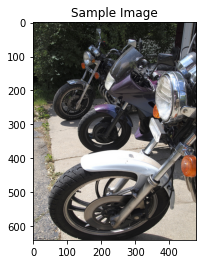

A motorcycle parked on the side of a road.


In [37]:
get_prediction()

In [38]:
#Custom image prediction

In [45]:
def get_custom_prediction(tgt_image):
    out_image = tgt_image.to(device)
    out_image = out_image.reshape(1, out_image.shape[0], out_image.shape[1], out_image.shape[2])
    #print(out_image.shape)
    features = encoder(out_image).unsqueeze(1)
    output = decoder.sample(features)    
    sentence = clean_sentence(output)
    print(sentence)

In [46]:
#img to load
from PIL import Image

img_dir = "images/"
img_name = "gordo.png"
img_title = "Gordo - my dog"

ct_image = Image.open(img_dir + img_name)
#im.show()
#print(ct_image.size)

#transform_img
transformerd_image = transform_test(ct_image)

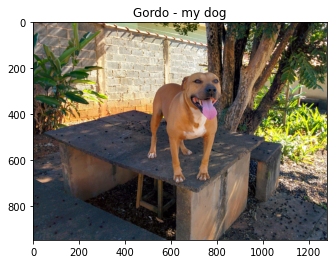

A dog is sitting on a bench in a park.


In [50]:
plt.imshow(np.squeeze(ct_image))
plt.title(img_title)
plt.show()
get_custom_prediction(transformerd_image)